# Reading in Data and Filtering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn import mixture

In [75]:
full = pd.read_csv('data/ChodroffGoldenWilson2019_vot_avg.csv', delimiter = ',', na_filter=False)

In [151]:
full

,vot.category,poa2,vot.mu,lang
0,short.lag,coronal,33.550000,Afro-Asiatic_Amharic_NA
1,short.lag,dorsal,43.800000,Afro-Asiatic_Amharic_NA
2,short.lag,labial,19.000000,Afro-Asiatic_Amharic_NA
3,lead,coronal,-71.000000,Afro-Asiatic_Arabic_NA
4,lead,dorsal,-57.000000,Afro-Asiatic_Arabic_NA
5,lead,labial,-64.000000,Afro-Asiatic_Arabic_NA
6,long.lag,coronal,33.500000,Afro-Asiatic_Arabic_NA
7,long.lag,dorsal,42.700000,Afro-Asiatic_Arabic_NA
8,short.lag,coronal,28.500000,Afro-Asiatic_Dahalo_NA
9,short.lag,dorsal,27.000000,Afro-Asiatic_Dahalo_NA


In [76]:
full['lang'] = full[['family', 'language', 'dialect']].apply(lambda x: '_'.join(x), axis=1)
full = full.drop(['family', 'language', 'dialect'], axis=1)

In [147]:
dc = {'lead':0, 'short.lag':1, 'long.lag':2}
# full['vot'] = full['vot.category'].map(dc)

In [219]:
g = full.groupby(['lang']).filter(lambda x: len(x) == 9)
len(g)

63

In [80]:
g = full.groupby(['lang','vot.category']).filter(lambda x: len(x) == 3)

In [97]:
langs = g.lang.unique()
cats = g['vot.category'].unique()
poas = g.poa2.unique()

In [150]:
g.groupby(['lang','vot.category'])['poa2'].apply(list) #IMPT: coronal, dorsal, labial

lang                               vot.category
Afro-Asiatic_Amharic_NA            short.lag       [coronal, dorsal, labial]
Afro-Asiatic_Arabic_NA             lead            [coronal, dorsal, labial]
Afro-Asiatic_Dahalo_NA             short.lag       [coronal, dorsal, labial]
Afro-Asiatic_Hebrew (Modern)_NA    lead            [coronal, dorsal, labial]
                                   long.lag        [coronal, dorsal, labial]
Afro-Asiatic_Musey_NA              short.lag       [coronal, dorsal, labial]
Algic_Ojibwe_Salteaux              short.lag       [coronal, dorsal, labial]
Altaic_Azerbaijani_NA              long.lag        [coronal, dorsal, labial]
                                   short.lag       [coronal, dorsal, labial]
Altaic_Turkish_NA                  lead            [coronal, dorsal, labial]
                                   long.lag        [coronal, dorsal, labial]
Austro-Asiatic_Pnar_NA             long.lag        [coronal, dorsal, labial]
                            

In [139]:
X = g.groupby(['lang','vot.category'])['vot.mu'].apply(list) #IMPT: coronal, dorsal, labial

In [140]:
X

lang                               vot.category
Afro-Asiatic_Amharic_NA            short.lag                                     [33.55, 43.8, 19.0]
Afro-Asiatic_Arabic_NA             lead                                        [-71.0, -57.0, -64.0]
Afro-Asiatic_Dahalo_NA             short.lag                                      [28.5, 27.0, 20.0]
Afro-Asiatic_Hebrew (Modern)_NA    lead                                        [-90.9, -81.3, -91.9]
                                   long.lag                                    [34.55, 58.95, 27.05]
Afro-Asiatic_Musey_NA              short.lag                                      [18.5, 31.5, 20.5]
Algic_Ojibwe_Salteaux              short.lag            [19.425, 17.5708333333333, 8.75833333333333]
Altaic_Azerbaijani_NA              long.lag                                  [87.09, 115.905, 86.88]
                                   short.lag                                  [13.35, 44.715, 10.64]
Altaic_Turkish_NA                  lead    

In [141]:
X.keys()

MultiIndex(levels=[['Afro-Asiatic_Amharic_NA', 'Afro-Asiatic_Arabic_NA', 'Afro-Asiatic_Dahalo_NA', 'Afro-Asiatic_Hebrew (Modern)_NA', 'Afro-Asiatic_Musey_NA', 'Algic_Ojibwe_Salteaux', 'Altaic_Azerbaijani_NA', 'Altaic_Turkish_NA', 'Austro-Asiatic_Pnar_NA', 'Austro-Asiatic_Remo_NA', 'Austronesian_Belep_NA', 'Austronesian_Madurese_NA', 'Austronesian_Malay_Singaporean', 'Austronesian_Tsou_NA', 'Austronesian_Yapese_NA', 'Burushaski_Burushaski_NA', 'Chapacura-Wanham_Wari'_NA', 'Creole_Hawaiian Creole_NA', 'Dravidian_Tamil_NA', 'Dravidian_Tamil_Singaporean', 'Dravidian_Telugu_NA', 'Ijoid_Defaka_NA', 'Indo-European_Armenian (Eastern)_NA', 'Indo-European_Assamese_Nalbaria', 'Indo-European_Bengali_Bangla', 'Indo-European_Bengali_East Bengali', 'Indo-European_Catalan_NA', 'Indo-European_Croatian_NA', 'Indo-European_Danish_NA', 'Indo-European_Dutch_NA', 'Indo-European_English_American', 'Indo-European_English_British', 'Indo-European_English_Canadian', 'Indo-European_English_NA', 'Indo-European_En

In [152]:
data = []
langs = []
for k in X.keys():
    lang = k[0]
    votc = dc[k[1]]
    c,d,l = X[k]
    langs.append(k[0])
    data.append([votc,l,c,d])

In [ ]:
#lang_labels = []
#for idx,row in grouped.iterrows():
#    lang_labels.append(row['lang'])

In [ ]:
# data  = filt_grouped.values[:,0:3]
# langs = filt_grouped.values[:,3]

In [183]:
data = np.array(data)
print(data.shape)
data[:,0:10]

(221, 4)


array([[   1.        ,   19.        ,   33.55      ,   43.8       ],
       [   0.        ,  -64.        ,  -71.        ,  -57.        ],
       [   1.        ,   20.        ,   28.5       ,   27.        ],
       [   0.        ,  -91.9       ,  -90.9       ,  -81.3       ],
       [   2.        ,   27.05      ,   34.55      ,   58.95      ],
       [   1.        ,   20.5       ,   18.5       ,   31.5       ],
       [   1.        ,    8.75833333,   19.425     ,   17.57083333],
       [   2.        ,   86.88      ,   87.09      ,  115.905     ],
       [   1.        ,   10.64      ,   13.35      ,   44.715     ],
       [   0.        ,  -65.95      ,  -52.9       ,   -9.75      ],
       [   2.        ,   40.75      ,   49.7       ,   69.35      ],
       [   2.        ,   55.5       ,   58.5       ,   73.5       ],
       [   1.        ,    8.        ,    8.5       ,   19.5       ],
       [   1.        ,   29.        ,   25.        ,   36.        ],
       [   1.        ,   19.      

In [158]:
len(langs)

221

# GMM Modeling

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import pandas as pd
from sklearn.mixture import GMM

In [193]:
X = data

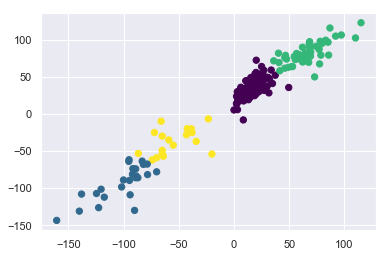

In [195]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 1], X[:, 3], c=labels, s=40, cmap='viridis');

In [199]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
#     ax.axis('equal')
    ax.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

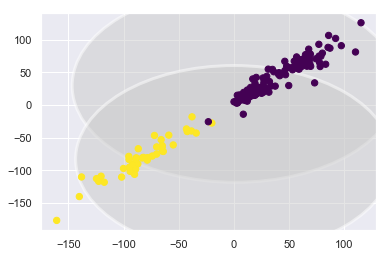

In [202]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X)

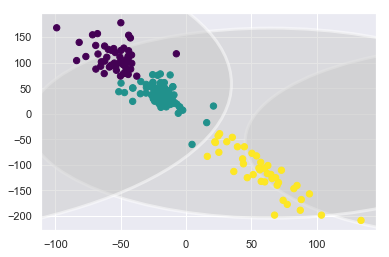

In [204]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(4, 4))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

# GMMs

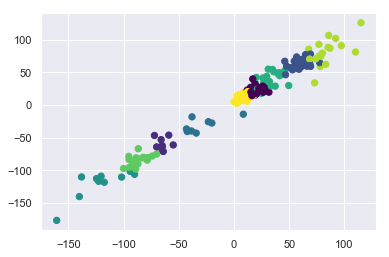

In [215]:
from sklearn.mixture import GMM
gmm = GMM(n_components=9).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [209]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


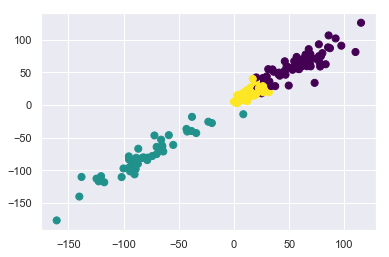

In [211]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis', s=size);

In [213]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 1], X[:, 2], s=40, zorder=2)
#     ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

ValueError: too many values to unpack (expected 2)

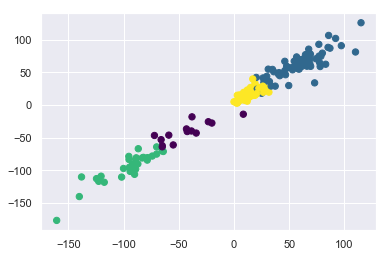

In [214]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

In [ ]:
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

# Now, vot.category + vot

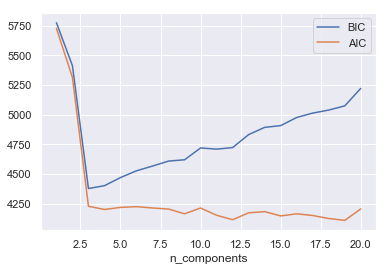

In [217]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');